In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

#reading the csv file
file = pd.read_csv("/Users/admin/Documents/Manipal/MRM/Week-3-Project/Country-data.csv")
file.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
country = file.pop('country')

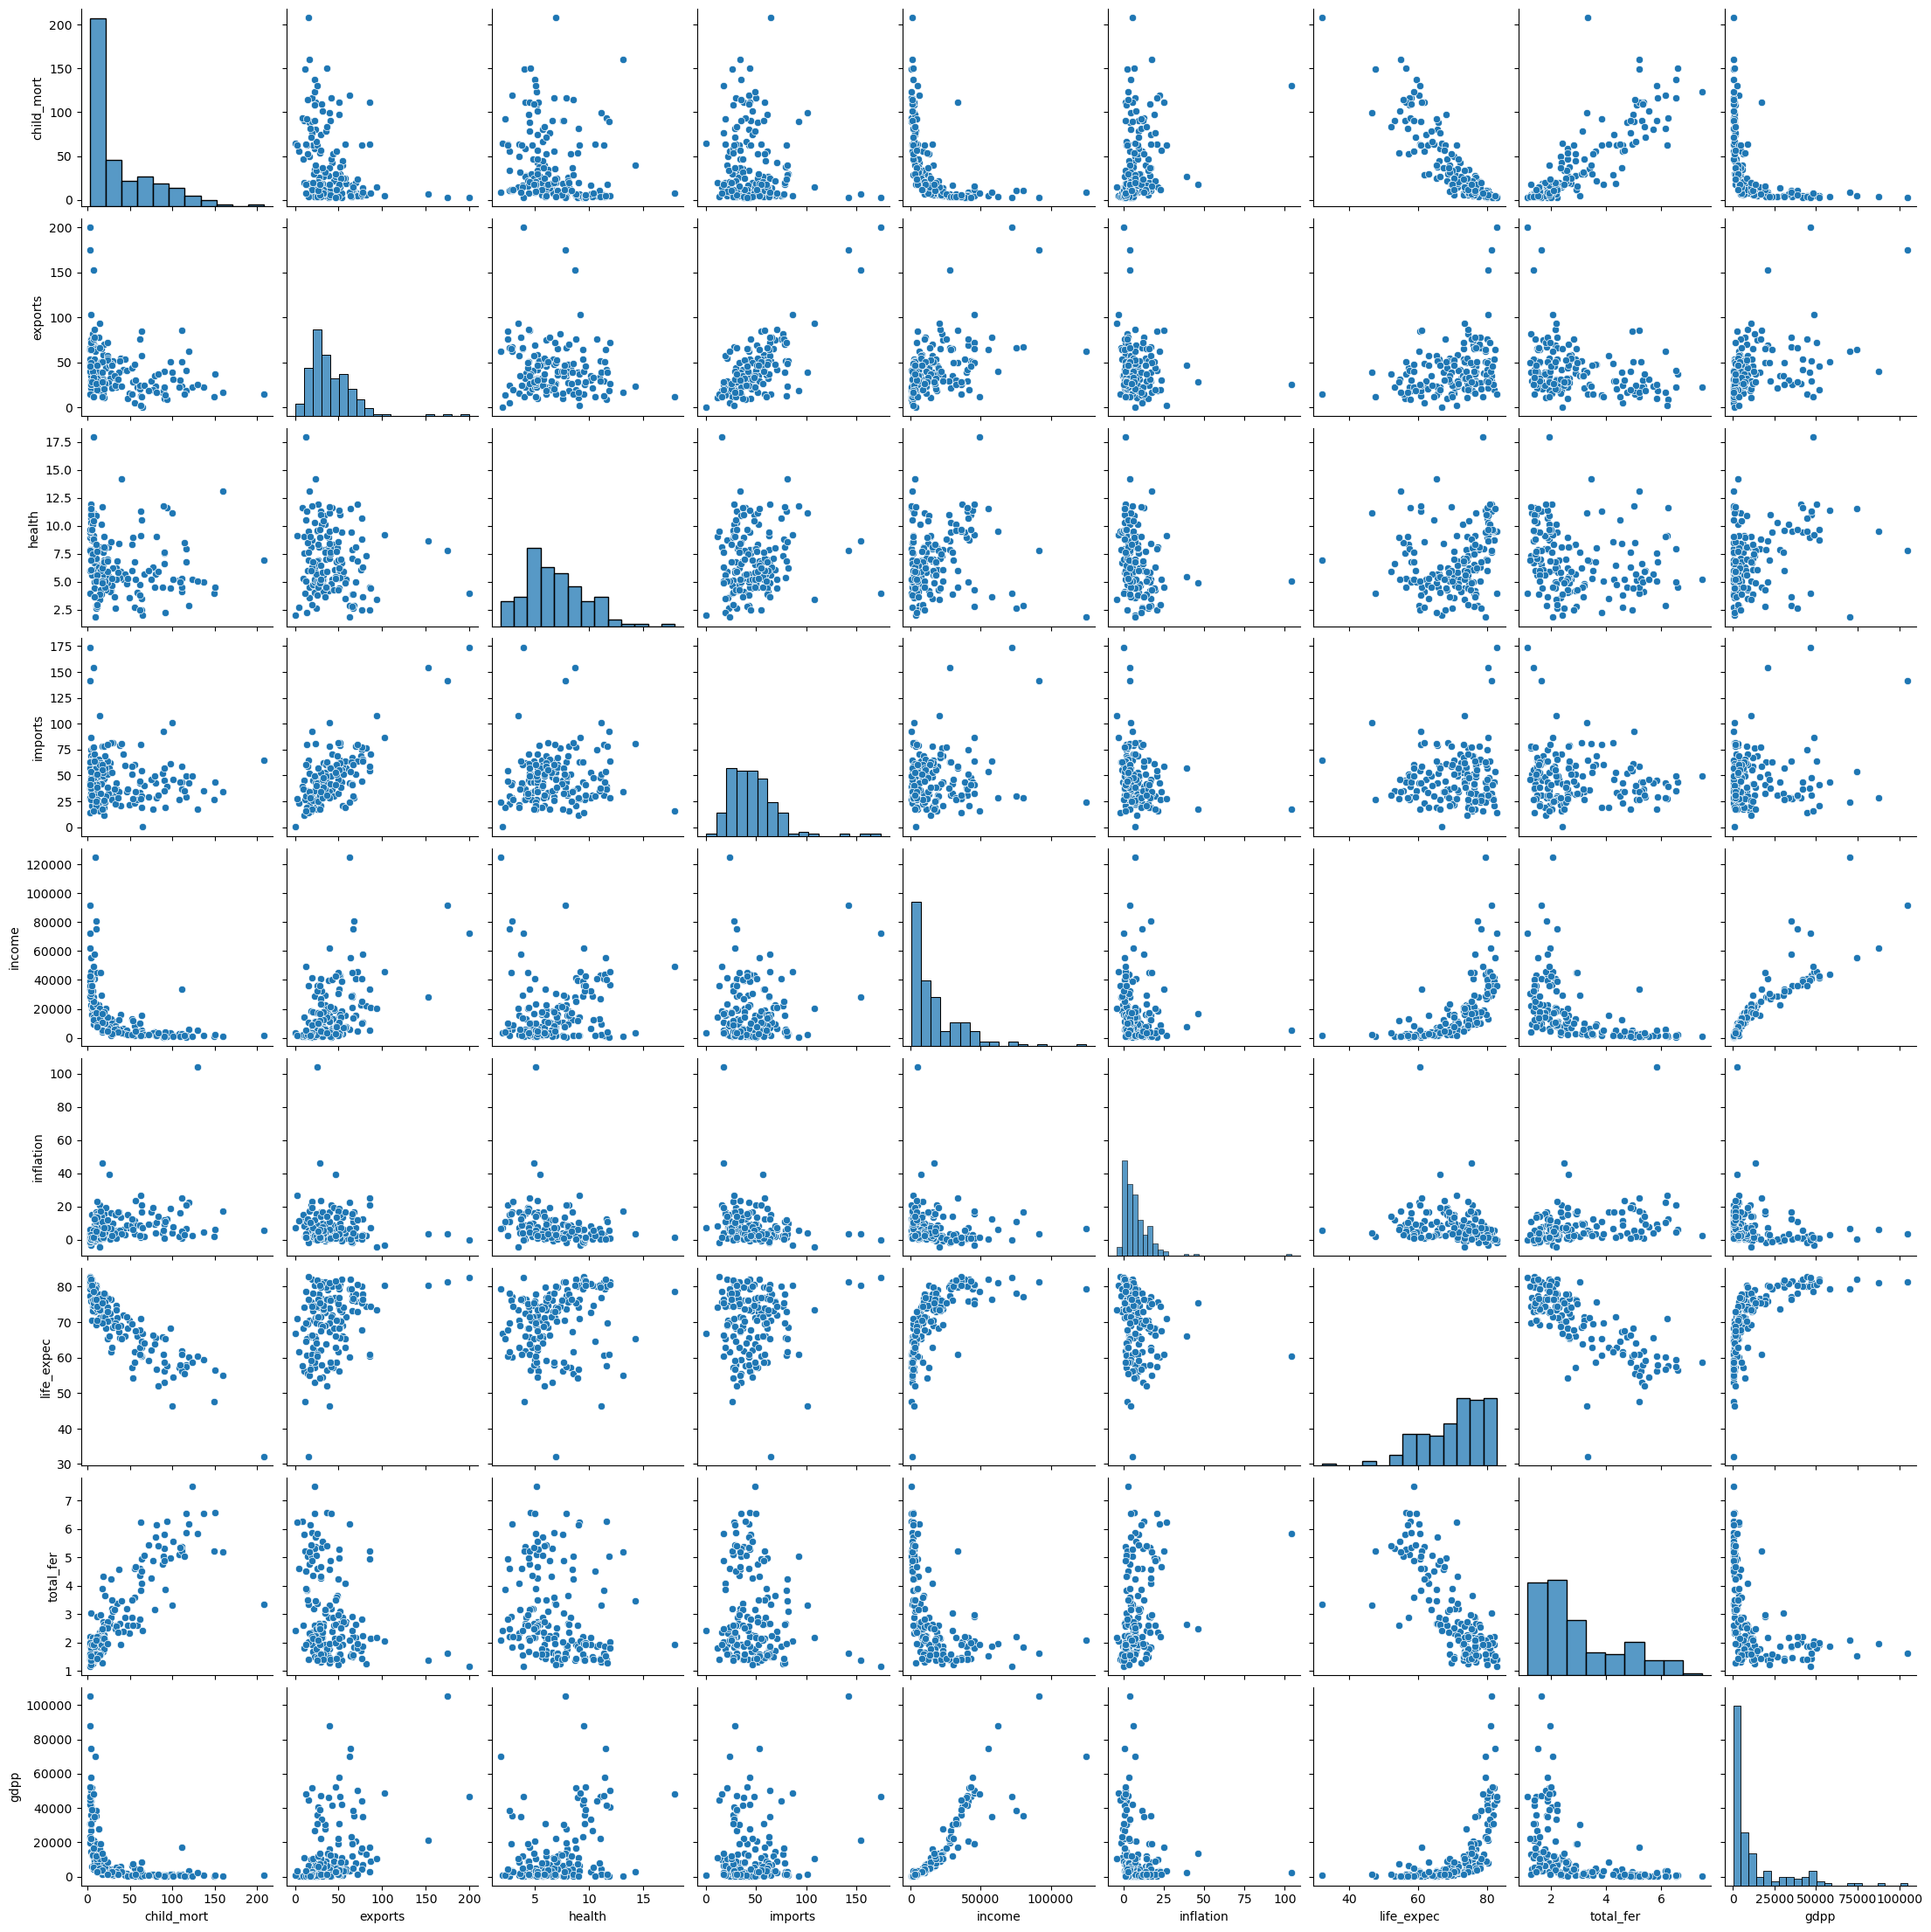

In [3]:
sns.pairplot(file)

In [4]:
arr = file.to_numpy()

In [5]:
#finding correlation between columns
file.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [6]:
#examine covariance
file.cov()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1626.422713,-351.651128,-22.199943,-124.201982,-4.076360e+05,122.893627,-318.008262,51.801162,-3.570463e+05
exports,-351.651128,751.418298,-8.614534,489.350622,2.730946e+05,-31.090078,77.110598,-13.279671,2.103785e+05
health,-22.199943,-8.614534,7.545116,6.365141,6.861669e+03,-7.415093,5.146808,-0.817828,1.741797e+04
imports,-124.201982,489.350622,6.365141,586.104198,5.712872e+04,-63.208898,11.710284,-5.829066,5.125005e+04
income,-407635.982270,273094.598023,6861.669071,57128.721588,3.716439e+08,-30110.122438,104916.785517,-14645.727927,3.164430e+08
inflation,122.893627,-31.090078,-7.415093,-63.208898,-3.011012e+04,111.739781,-22.533965,5.071509,-4.294042e+04
life_expec,-318.008262,77.110598,5.146808,11.710284,1.049168e+05,-22.533965,79.088507,-10.243585,9.781472e+04
total_fer,51.801162,-13.279671,-0.817828,-5.829066,-1.464573e+04,5.071509,-10.243585,2.291734,-1.262233e+04
gdpp,-357046.306154,210378.470377,17417.971217,51250.050217,3.164430e+08,-42940.421636,97814.722603,-12622.333657,3.359414e+08


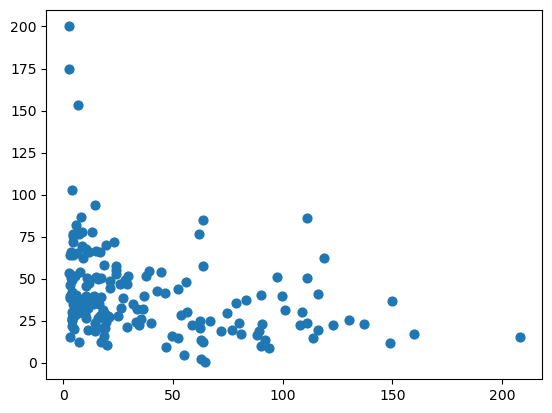

In [7]:
plt.scatter(arr[:, 0], arr[:, 1], s=40, cmap=plt.cm.Spectral)
plt.show()

In [8]:
class PCA:
  
  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, x):
    # copying x because can be a float type
    x = x.astype(float)

    # normalized data
    x_norm = (x-np.mean(x, axis=0))/x.std()


    # covariance, function needs samples as columns
    covariance = x_norm.T.dot(x_norm)

    # eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance)

    # sort eigenvectors
    eigenvectors = eigenvectors.T
    indx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[indx]
    sorted_eigenvectors = eigenvectors[:,indx]

    # select a subset from the rearranged eigenvalue matrix as per our need
    self.components = eigenvectors[0:self.n_components]
    self.eigenvectors_subset = sorted_eigenvectors[:, 0:self.n_components]
    return sorted_eigenvalues, sorted_eigenvectors, self.eigenvectors_subset
    

  def projection_data(self, x):
    # project data
    x_norm = (x-np.mean(x, axis=0))/x.std()
    return np.dot(self.eigenvectors_subset.T, x_norm.T).T

Shape of X : (167, 9)
 
 
 
Eigenvalues are : [9.42513020e+02 5.17762631e+01 1.75785653e-03 1.37897608e-03
 1.89908304e-04 1.03272470e-04 1.81021872e-05 5.95498993e-06
 8.59984912e-07]
 
 
 
Eigenvectors are : [[ 8.07327698e-04 -5.11348092e-04 -2.52724061e-05 -1.14384869e-04
  -7.26746756e-01  7.65998651e-05 -2.13850032e-04 -6.86904777e-01
   2.87952778e-05]
 [-5.57055026e-04  9.41707964e-04 -2.15627987e-04  5.41883715e-05
   6.86903991e-01  2.85616792e-04  2.66353737e-05 -7.26747258e-01
  -2.40728708e-05]
 [ 9.25215339e-01 -2.28627282e-01 -9.25844014e-03 -2.42704100e-01
   1.17358496e-03  8.73842384e-02 -1.55747044e-01  1.16146666e-04
   2.86462224e-02]
 [ 3.28783999e-01  6.52814366e-01 -7.58649598e-03  6.78156522e-01
  -4.12812338e-04 -2.19844970e-02 -7.23212921e-02  2.44967157e-04
   8.16973465e-03]
 [-3.94786565e-02  5.94987240e-01 -7.77516009e-02 -5.29179120e-01
  -6.84017169e-04  5.95872597e-01  5.69356462e-02  3.74367532e-04
   7.02425075e-03]
 [ 6.08330796e-02  4.01990656e-01 -

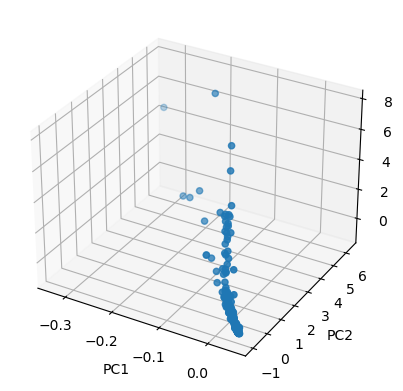

In [9]:
pca = PCA(3)
sorted_eigenvalues, sorted_eigenvectors, eigenvectors_sorted = pca.fit(arr)
X_projected = pca.projection_data(arr)

print(f"Shape of X : {arr.shape}")
print(" ")
print(" ")
print(" ")
print(f"Eigenvalues are : {sorted_eigenvalues}")
print(" ")
print(" ")
print(" ")
print(f"Eigenvectors are : {sorted_eigenvectors}")
print(" ")
print(" ")
print(" ")
print(f"The eigenvectors selected are : {eigenvectors_sorted}")
print(" ")
print(" ")
print(" ")

# Plot the first three PCs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_projected[:,0], X_projected[:,1], X_projected[:,2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [10]:
# Calculate the proportion of variance explained by each principal component
variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
percent_variance = 100 * variance

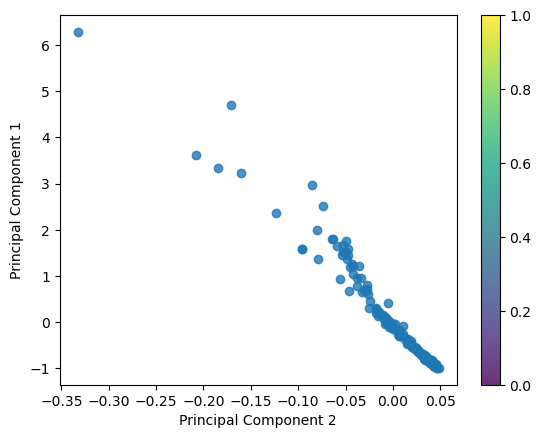

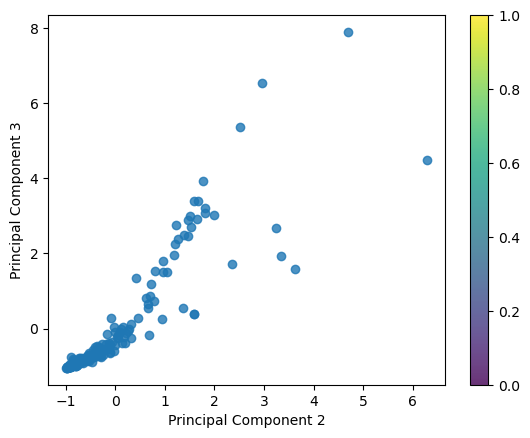

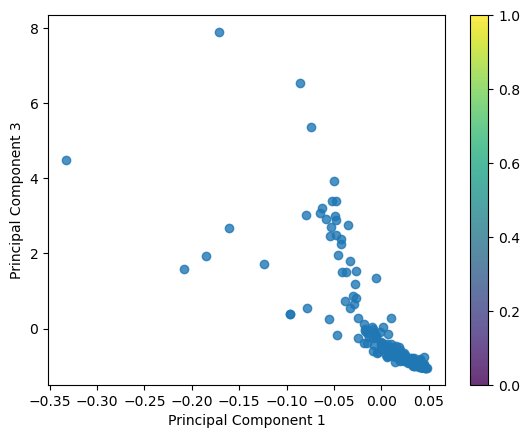

In [11]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
x3 = X_projected[:, 2]

plt.scatter(x1, x2, alpha=0.8)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 1')
plt.colorbar()
plt.show()


plt.scatter(x2, x3, alpha=0.8)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.colorbar()
plt.show()

plt.scatter(x1, x3, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.colorbar()
plt.show()

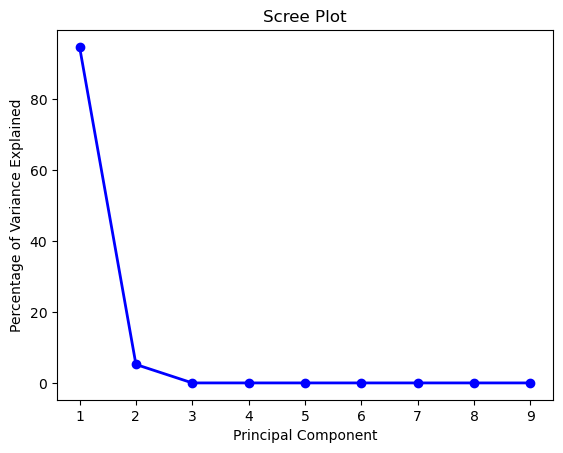

In [12]:
# Plot the scree plot
plt.plot(range(1, len(percent_variance)+1), percent_variance, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.title('Scree Plot')
plt.show()

In [13]:
#clearly only 2 PCs are required

In [14]:
#initializing centroids
def random_centroid(k,data):
  n=len(data)
  indices=np.random.choice(n,size=k)
  centroids=data[indices,:]
  return centroids

In [15]:
#getting labels
def labels(data,centroids,k):
  distances=np.zeros((len(data),k))
  for i in range(k):
    distances[:,i]=np.sqrt(np.sum(np.square(data-centroids[i]),axis=1))
  return np.argmin(distances,axis=1)
    

In [16]:
def k_means(data,centroids,k,iterations):

  old_centroids=np.zeros(np.shape(centroids))
  label=np.zeros(k)

  for i in range(iterations):
  
    if np.array_equal(old_centroids,centroids):
      return centroids,label
    old_centroids=centroids.copy()

    label=labels(data,centroids,k)

    for j in range(k):
      cluster=data[label==j]
      if len(cluster)>0:
        centroids[j,:]=cluster.mean(axis=0)

  return centroids,label


In [17]:
def fit(data_fit,cost_list,iters):

  for i in range(1,iters):

    centroids=random_centroid(i,data_fit)
    centroids,label=k_means(data_fit,centroids,i,100)

    dist=np.zeros(i)

    for j in range(i):
      dist[j]=np.sum(np.sum(np.square(data_fit[label==j]-centroids[j]),axis=1))

    cost=np.sum(dist)
    cost_list.append(cost)

  return cost_list

iters=10
cost_list=[]
cost_list=fit(X_projected,cost_list,iters)

<function matplotlib.pyplot.show(close=None, block=None)>

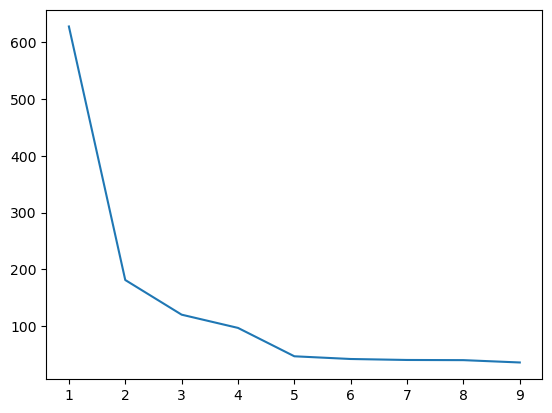

In [18]:
#elbow method
xpoints=np.arange(1,iters)

plt.plot(xpoints, cost_list)
plt.show

In [19]:
#clustering
k=3
centroids=random_centroid(k,X_projected)
print(centroids)

iterations=100
centroids,label=k_means(X_projected,centroids,k,iterations)
print(centroids)

[[ 0.03480938 -0.76759215 -0.97651348]
 [-0.03845692  0.78575094  0.74164054]
 [ 0.01008859 -0.08112852  0.2911833 ]]
[[ 0.0284023  -0.65338149 -0.83551975]
 [-0.09055858  2.22961211  3.25043918]
 [-0.02554407  0.48727171  0.34930265]]


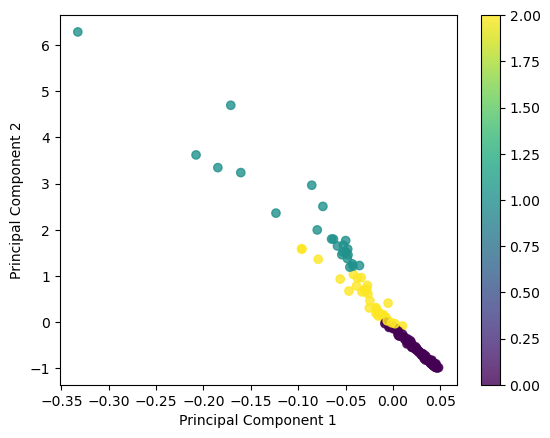

In [20]:
plt.scatter(x1, x2, alpha=0.8, c=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

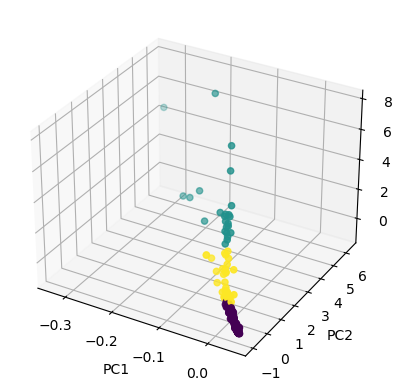

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_projected[:,0], X_projected[:,1], X_projected[:,2],c=label)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()